In [1]:
import numpy
import shapely.geometry
import shapely.ops

In [2]:
def generate_rectangle_vertices(hx: float, hy: float, center: numpy.ndarray,
                                angle: float) -> numpy.ndarray:
    """Generate a rectangle polygon."""
    points = numpy.array([[hx, hy], [-hx, hy], [-hx, -hy], [hx, -hy]])
    points = points @ create_2D_rotation_matrix(angle).T
    points += center
    return points


def generate_rectangle(hx: float, hy: float, center: numpy.ndarray,
                       angle: float) -> shapely.geometry.Polygon:
    """Generate a rectangle polygon."""
    return shapely.geometry.Polygon(
        generate_rectangle_vertices(hx, hy, center, angle))

def create_2D_rotation_matrix(theta: float) -> numpy.ndarray:
    c, s = numpy.cos(theta), numpy.sin(theta)
    return numpy.array([[c, -s], [s, c]])

In [3]:
rect1 = generate_rectangle(1, 1, numpy.array([0, 0]), 0)
rect2 = generate_rectangle(1, 1, numpy.array([0.5, 0]), 0)

In [4]:
rect3 = shapely.ops.cascaded_union([rect1, rect2])

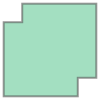

In [10]:
shapely.ops.cascaded_union([shapely.geometry.box(-1 + i * 0.5, -1 + i * 0.5, 1 + i * 0., 1), shapely.geometry.box(-0.5, -0.5, 1.5, 1.5)])